<a href="https://colab.research.google.com/github/Satyake/Time-Series-Analysis-spagheti-code/blob/master/VECTOR_AUTOREGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 

In [30]:
data_money=pd.read_csv('/content/M2SLMoneyStock.csv',index_col='Date',parse_dates=True)
data_pce=pd.read_csv('/content/PCEPersonalSpending.csv',index_col='Date',parse_dates=True)

In [31]:
df=data_money.join(data_pce)

In [32]:
df_concat=pd.concat([data_money,data_pce],axis=1)

In [14]:
df_concat

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
...,...,...
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8
2015-10-01,12187.7,12416.1


In [15]:
df_concat.shape

(252, 2)

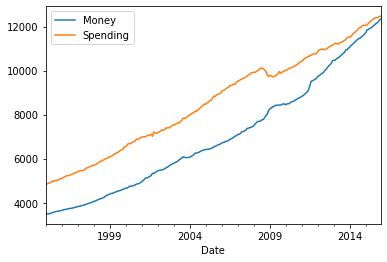

In [16]:
df_concat.plot()

In [17]:
#test forstationarity

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
adfuller(df_concat['Money'])

(4.239022425670651,
 1.0,
 4,
 247,
 {'1%': -3.457105309726321,
  '10%': -2.5730443824681606,
  '5%': -2.873313676101283},
 2219.917877142354)

In [35]:
adfuller(df_concat['Spending'])

(0.14979608598625482,
 0.9693009944428312,
 3,
 248,
 {'1%': -3.4569962781990573,
  '10%': -2.573018897632674,
  '5%': -2.8732659015936024},
 2339.735574840993)

In [22]:
#p value is greater than alpha in both the cases at 1.0 and 0.96  - non stationary

In [36]:
df_concat_diff=df_concat.diff()

In [37]:
df_concat_diff.dropna(inplace=True)

In [42]:
adfuller(df_concat_diff['Money'])  #stationary  -2.05 >-2.87

(-2.0574040497379373,
 0.2619837978511253,
 15,
 235,
 {'1%': -3.4584868856997004,
  '10%': -2.573367247623359,
  '5%': -2.873918902362675},
 2222.948346069441)

In [44]:
df_concat_diff_2=df_concat_diff.diff()


In [46]:
df_concat_diff_2.dropna(inplace=True)

In [52]:
df_concat_diff_2

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
...,...,...
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8
2015-10-01,-23.1,24.5


In [55]:
shape(df_concat_diff_2)

NameError: ignored

In [51]:
#adfuller(df_concat_diff_2['Money']) #-7.077 is less than 5% stationary  #Money 2nd order
adfuller(df_concat_diff_2['Spending'])  #-8.76 is less than 5%  #stationary

(-8.760145426337719,
 2.6878999679871547e-14,
 8,
 241,
 {'1%': -3.4577787098622674,
  '10%': -2.573201765981991,
  '5%': -2.873608704758507},
 2339.3283710766104)

In [43]:
adfuller(df_concat_diff['Spending'])  #-7.22 is less than 5%  #stationary

(-7.226973930850647,
 2.0410272592129706e-10,
 2,
 248,
 {'1%': -3.4569962781990573,
  '10%': -2.573018897632674,
  '5%': -2.8732659015936024},
 2328.23145843905)

In [21]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [56]:
df_concat_diff_2

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
...,...,...
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8
2015-10-01,-23.1,24.5


In [60]:
train=df_concat_diff_2[:200]
test=df_concat_diff_2[200:]

In [59]:
start=len(train)
stop=len(train)+len(test)

In [68]:
from statsmodels.tsa.api import  VAR

In [74]:
model=VAR(train)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [72]:
for p in range(10):
  results=model.fit(p)
  print(p)
  print(results.aic)

0
14.766530094380567
1
14.207647855713152
2
13.955605574129493
3
13.823291908532902
4
13.804587287423413
5
13.768661667134804
6
13.79767252212603
7
13.809790410194859
8
13.762618402750412
9
13.789227123221588


In [79]:
#5th order lowest AIC
fitted_model=model.fit(5)

In [80]:
fitted_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Nov, 2020
Time:                     14:48:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1379
Nobs:                     195.000    HQIC:                   13.9182
Log likelihood:          -1873.83    FPE:                    954460.
AIC:                      13.7687    Det(Omega_mle):         855249.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               1.146828         1.895778            0.605           0.545
L1.Money           -0.616528         0.076903           -8.017           0.000
L1.Spending        -0.107539         0.053979           -1.992      

In [ ]:
fitted_model.forecast(12)

In [89]:
train.values.shape #need last 5 lag values
lagged_values=train.values[-10:]

In [88]:
train.shape

(200, 2)

In [94]:
z=results.forecast(y=lagged_values,steps=12)

In [91]:
idx=pd.date_range('2015-01-01',periods=12)

In [92]:
idx

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12'],
              dtype='datetime64[ns]', freq='D')

In [96]:
df_forecast=pd.DataFrame(data=z,index=idx,columns=['Money_2d','Spending_2d'])

In [112]:
test=test[38:]

In [114]:
len(test)

12

In [115]:
from statsmodels.tools.eval_measures import rmse

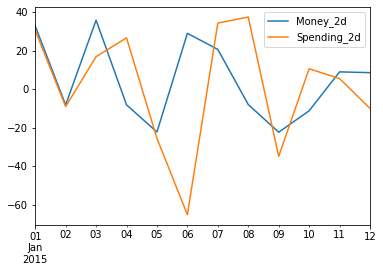

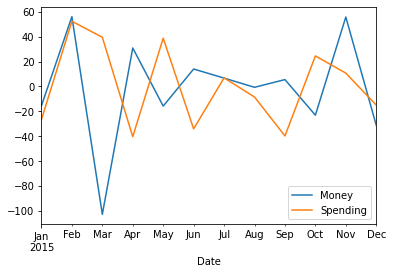

In [113]:
df_forecast.plot()
test.plot()

In [109]:
test.index

DatetimeIndex(['2011-11-01', '2011-12-01', '2012-01-01', '2012-02-01',
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [117]:
rmse(test['Money'],df_forecast['Money_2d'])

52.0057547238541